In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [3]:
band4=rasterio.open(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\Red') # red
band8=rasterio.open(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 8\Nir') # nir

C:\Users\win\Anaconda3\envs\geo_lib\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<AxesSubplot:>

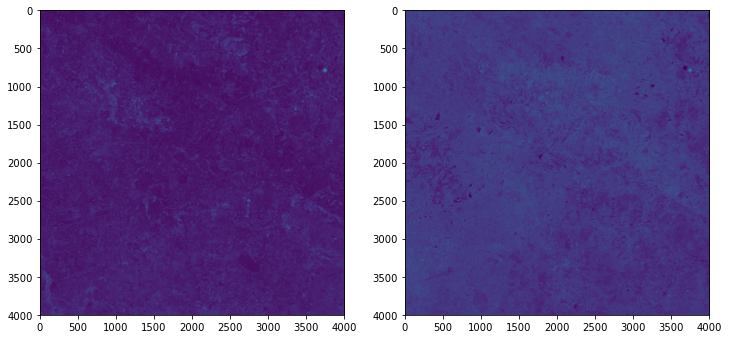

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1) #red
plot.show(band8, ax=ax2) #nir

In [5]:
Red=band4.read(1).astype('float64')

In [6]:
Red

array([[ 618.,  556.,  561., ...,  868.,  717., 1002.],
       [ 598.,  564.,  568., ...,  818.,  705.,  823.],
       [ 569.,  621.,  634., ...,  893.,  690.,  674.],
       ...,
       [1539., 1488., 1401., ..., 1434., 1453., 1453.],
       [1636., 1533., 1431., ..., 1457., 1421., 1417.],
       [1800., 1597., 1717., ..., 1394., 1373., 1382.]])

In [7]:
Nir=band8.read(1).astype('float64')

In [8]:
Nir

array([[3228., 3283., 3330., ..., 2700., 2633., 2472.],
       [3104., 3148., 3240., ..., 2790., 2748., 2475.],
       [3194., 3272., 3418., ..., 2874., 2583., 2154.],
       ...,
       [2536., 2396., 2298., ..., 1668., 1682., 1691.],
       [2500., 2338., 2264., ..., 1717., 1686., 1684.],
       [2557., 2445., 2476., ..., 1906., 1865., 1837.]])

In [9]:
# ndvi calculation
ndvi=np.where((Nir+Red)==0.,0,(Nir-Red)/(Nir+Red))
ndvi[:5,:5]

array([[0.67862715, 0.71034123, 0.71164225, 0.70873269, 0.69708957],
       [0.67693139, 0.69612069, 0.70168067, 0.68461966, 0.67014878],
       [0.69758172, 0.68096584, 0.68706811, 0.64085846, 0.61504702],
       [0.70948012, 0.7008547 , 0.67428862, 0.60380349, 0.55414715],
       [0.67163399, 0.64056017, 0.60306554, 0.57150509, 0.55631399]])

-0.4464751958224543
0.8913043478260869


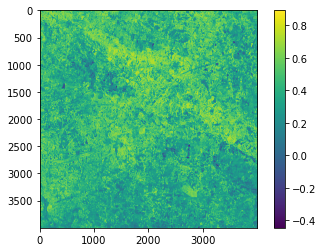

In [13]:
plt.imshow(ndvi)
plt.colorbar()
smallest = np.amin(ndvi)
biggest = np.amax(ndvi)
print(smallest)
print(biggest)

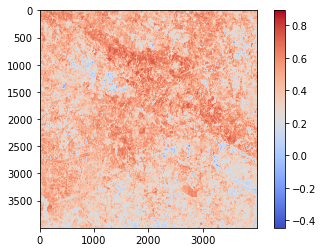

In [59]:
plt.imshow(ndvi,cmap='coolwarm')
plt.colorbar()

In [ ]:
ndviImage=rasterio.open(r'NDVIImage.tiff','w',driver='Gtiff',
                       width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()


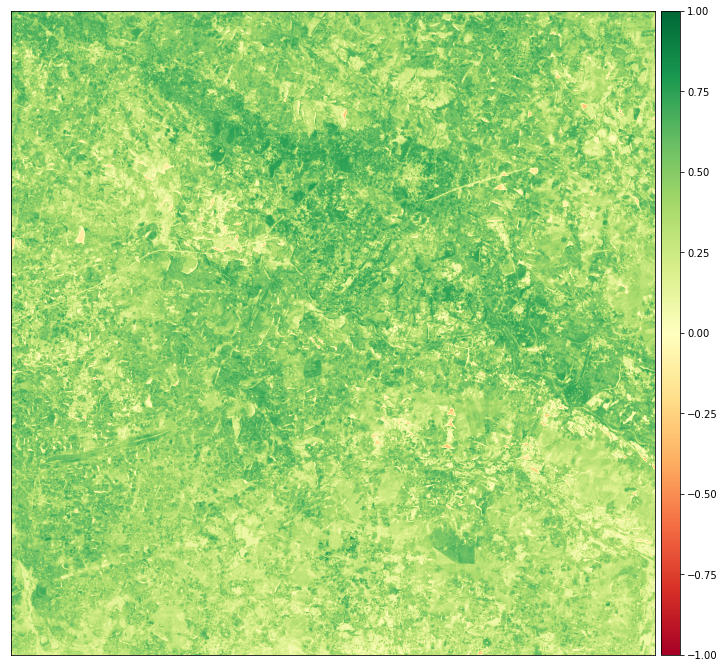

<AxesSubplot:>

In [62]:
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1)

In [63]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [72]:
# Create classes and apply to NDVI results

ndvi_class_bins=[-np.inf,0,0.1,0.25,0.4,np.inf]
ndvi_class=np.digitize(ndvi,ndvi_class_bins)


In [73]:
# applying no data mask to the newly classified NDVI
ndvi_class=np.ma.masked_where(np.ma.getmask(ndvi),ndvi_class)


In [74]:
#checking the no of unique values
np.unique(ndvi_class)


masked_array(data=[1, 2, 3, 4, 5],
             mask=False,
       fill_value=999999,
            dtype=int64)

In [110]:
colors=["Gray","yellow","ivory","lime","darkgreen"]
cmap=ListedColormap(colors)

# defining classes
ndvi_categories=["No Vegetation","Bare land","Low vegetation","Moderate vegetation","High vegetation"]



In [111]:
# getting the list of classes
classes=np.unique(ndvi_class)
classes=classes.tolist()

In [112]:
# removing the masks which will have none values
classes=classes[0:5]

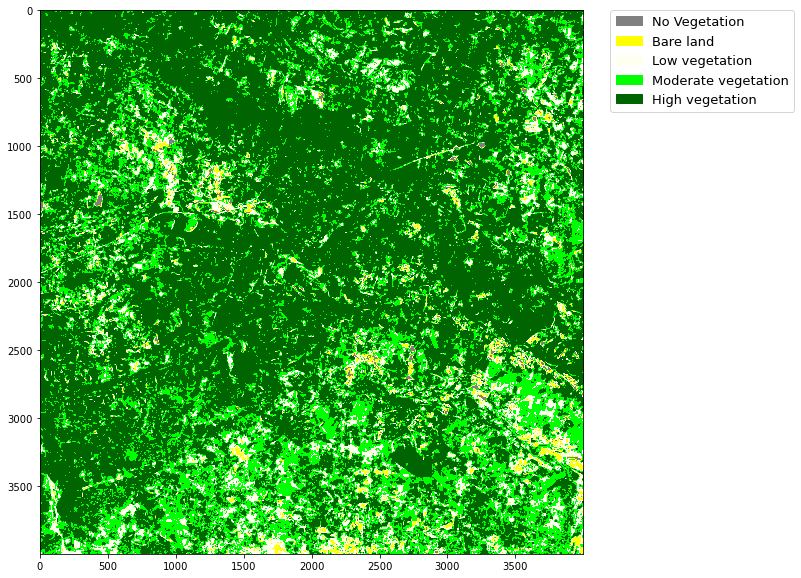

In [113]:
#plotting
fig,ax=plt.subplots(figsize=(10,10))
im=ax.imshow(ndvi_class,cmap=cmap)
ep.draw_legend(im_ax=im,classes=classes,titles=ndvi_categories)